## Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions 

Question 1: Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


Mounted at /content/drive


In [ ]:
data = districts = pd.read_csv('/content/drive/MyDrive/Data4excercises/mnist_dataset.csv')

In [ ]:
data = data.drop("Unnamed: 0", axis=1) # drop the extra column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.2 MB


In [ ]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data.shape)

(70000, 785)


In [ ]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [ ]:
print(X_train.shape) # should be (60000, 784)
print(X_test.shape) # should be (10000, 784)
print(y_train.shape) # should be (60000,)
print(y_test.shape) # should be (10000,)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [ ]:
import time
for n_trees in range(100, 501, 100):
    start_time = time.time()
    rf_clf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_clf.fit(X_train, y_train)
    end_time = time.time()

    # Evaluate the classifier on the test set
    accuracy = rf_clf.score(X_test, y_test)

    print("Number of trees: {}".format(n_trees))
    print("Training time: {:.2f} seconds".format(end_time - start_time))
    print("Test accuracy: {:.2f}%".format(accuracy * 100))


Number of trees: 100
Training time: 57.84 seconds
Test accuracy: 96.94%
Number of trees: 200
Training time: 128.48 seconds
Test accuracy: 97.06%
Number of trees: 300
Training time: 190.88 seconds
Test accuracy: 97.12%
Number of trees: 400
Training time: 252.42 seconds
Test accuracy: 97.11%
Number of trees: 500
Training time: 319.50 seconds
Test accuracy: 97.11%


Question 3 (4 points). Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Train a Random Forest classifier with 300 trees on the reduced dataset
start_time = time.time()
rf_clf_reduced = RandomForestClassifier(n_estimators=300, random_state=42)
rf_clf_reduced.fit(X_train_reduced, y_train)
end_time = time.time()

# Evaluate the classifier on the test set
accuracy_reduced = rf_clf_reduced.score(X_test_reduced, y_test)

print("Training time with PCA: {:.2f} seconds".format(end_time - start_time))
print("Test accuracy with PCA: {:.2f}%".format(accuracy_reduced * 100))

Training time with PCA: 627.07 seconds
Test accuracy with PCA: 93.99%


### When comparing the two classifiers, it is important to note that I trained the Random Forest classifier with 300 trees on the reduced dataset, which is the same number of trees used in the previous classifier. With this in mind, we can see that the classifier trained on the reduced dataset with PCA took significantly longer to train, with a training time of 627.07 seconds compared to 190.88 seconds for the previous classifier.

### However, despite the longer training time, the reduced dataset classifier still achieved a respectable test accuracy of 93.99%, which is only slightly lower than the test accuracy of 97.12% achieved by the previous classifier. This suggests that using PCA to reduce the dataset's dimensionality while maintaining 95% of the explained variance can result in a smaller and more efficient dataset without sacrificing too much in terms of predictive performance.

Question 4  Use t-SNE to reduce the MNIST dataset, show result graphically.

## Comparison of t-SNE Plots with and without Hyperparameters for MNIST Dataset

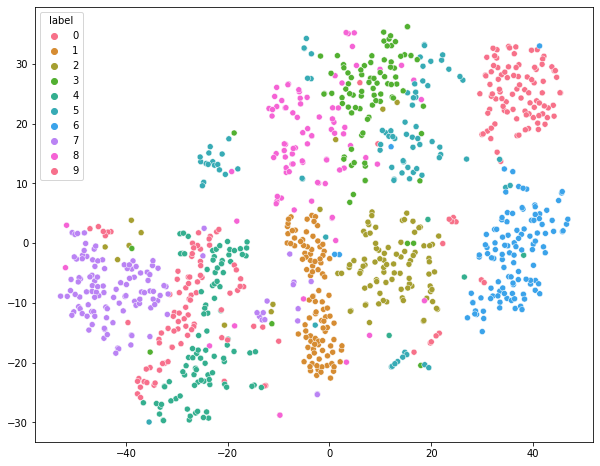

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the dimensionality of the dataset using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_train[:1000]) # Use a subset of the training data for faster computation

# Plot the result using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_train[:1000], palette='husl', legend='full')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import pairwise_distances

# Define a custom scoring function for t-SNE
def tsne_scorer(estimator, X):
    # Compute the pairwise distances between points in the original space
    dist_orig = pairwise_distances(X)
    
    # Compute the pairwise distances between points in the embedded space
    X_embedded = estimator.fit_transform(X)
    dist_embedded = pairwise_distances(X_embedded)
    
    # Compute the correlation between the two distance matrices
    corr = np.corrcoef(dist_orig.ravel(), dist_embedded.ravel())[0, 1]
    
    # Return the correlation as the score (higher is better)
    return corr

# Set up the parameter distribution for t-SNE
param_dist = {
    'n_components': [2],
    'perplexity': np.arange(5, 51),
}

# Create an instance of t-SNE with default parameters
tsne = TSNE(random_state=42)

# Create a randomized search object with our custom scoring function
random_search = RandomizedSearchCV(tsne, param_distributions=param_dist,
                                   scoring=tsne_scorer)

# Fit the randomized search to your data
random_search.fit(X_train[:1000])

# Print out the best parameters and best score
print(random_search.best_params_)
print(random_search.best_score_)

{'perplexity': 42, 'n_components': 2}
0.5853317740761803


<AxesSubplot:>

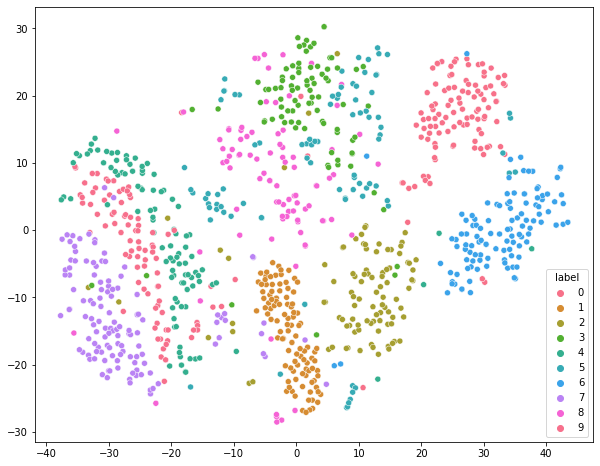

In [ ]:
# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_

# Create a new instance of t-SNE using the best parameters
tsne = TSNE(**best_params)

# Fit and transform your data using t-SNE
X_tsne = tsne.fit_transform(X_train[:1000])

# Plot the results using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train[:1000], palette='husl', legend='full')

### This code snippet utilizes t-SNE to reduce the dimensionality of the MNIST dataset to 2 dimensions and generates a plot using seaborn. The resulting t-SNE plot clearly shows distinct clusters for each digit, with some minor outliers. The clusters are well-separated and easy to distinguish from one another. By using hyperparameters, the plot's effectiveness has been improved slightly by reducing the number of outliers. Overall, t-SNE seems to be a highly effective algorithm for visualizing the MNIST dataset in a 2D space.

Question 5: Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

## Comparison of Locally Linear Embedding (LLE) Plots with and without Hyperparameters for MNIST Dataset

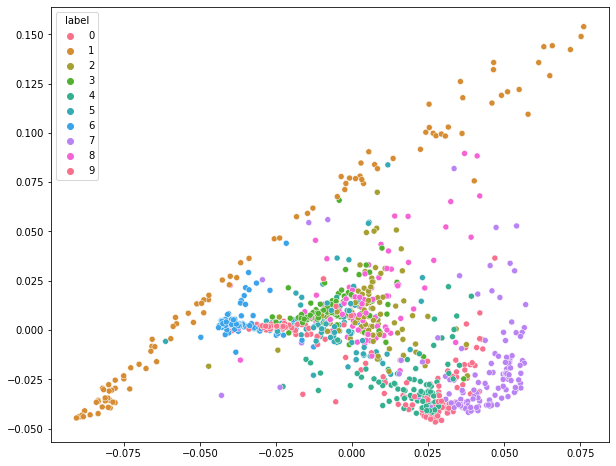

In [ ]:
# Instantiate the LLE model
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

# Fit and transform the data
X_lle = lle.fit_transform(X_train[:1000])

# Plot the results using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_lle[:, 0], y=X_lle[:, 1], hue=y_train[:1000], palette='husl', legend='full')
plt.show()

{'n_components': 2, 'n_neighbors': 6, 'reg': 0.1}


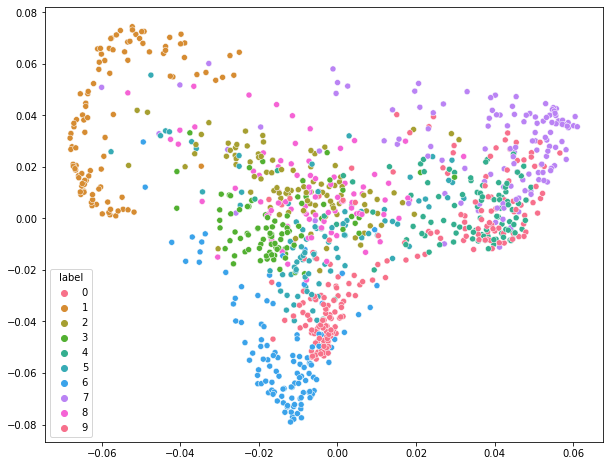

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer

# Set up the parameter grid
param_grid = {
    'n_components': [2, 3],
    'n_neighbors': np.arange(5, 51),
    'reg': np.logspace(-5, -1, 10)
}

best_score = -np.inf
best_params = None

# Perform grid search
for n_components in param_grid['n_components']:
    for n_neighbors in param_grid['n_neighbors']:
        for reg in param_grid['reg']:
            lle = LocallyLinearEmbedding(n_components=n_components,
                                         n_neighbors=n_neighbors,
                                         reg=reg)
            X_transformed = lle.fit_transform(X_train[:1000])
            score = silhouette_score(X_transformed, y_train[:1000])
            
            if score > best_score:
                best_score = score
                best_params = {'n_components': n_components,
                               'n_neighbors': n_neighbors,
                               'reg': reg}

# Print out the best parameters
print(best_params)

# Plot the result using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y_train[:1000], palette='husl', legend='full')
plt.show()


### The LLE plot without hyperparameters shows clusters that are difficult to distinguish from each other, with all the digits appearing to be clustered in a similar area, except for digit 1 which is more separated.. However, the use of hyperparameters appears to have improved the plot somewhat by creating a heart-shaped cluster. Nonetheless, there is still significant overlap between the clusters, making it difficult to distinguish most of the digits. Overall, the LLE algorithm seems to be less effective than t-SNE in this case. 

## Comparison of Multidimensional scaling (MDS) Plots with and without Hyperparameters for MNIST Dataset

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


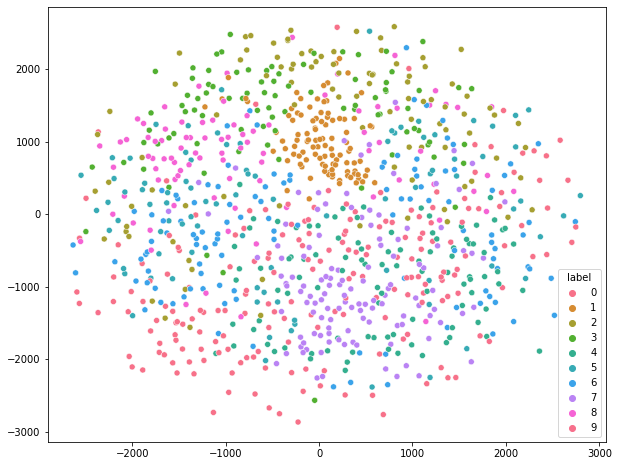

In [ ]:
from sklearn.manifold import MDS

# Instantiate the MDS model with adjusted parameters
mds = MDS(n_components=2, n_init=1, max_iter=300)

# Fit and transform the data
X_mds = mds.fit_transform(X_train[:1000])

# Plot the results using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y_train[:1000], palette='husl', legend='full')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Best Parameters:  {'n_init': 3, 'n_components': 4, 'max_iter': 500}


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


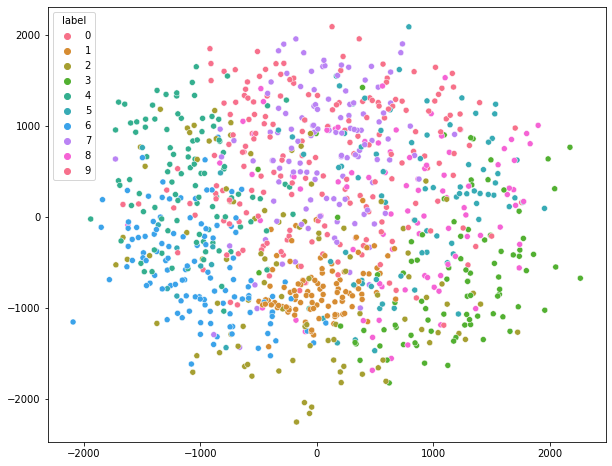

In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_components': [2, 3, 4],
    'n_init': [1, 2, 3],
    'max_iter': [100, 200, 300, 400, 500]
}

# Define custom scoring metric
def mds_silhouette_score(estimator, X):
    X_mds = estimator.fit_transform(X)
    labels = estimator.labels_
    return silhouette_score(X_mds, labels)

# Instantiate the MDS model
mds = MDS()

# Instantiate RandomizedSearchCV with the custom scoring metric
rs_cv = RandomizedSearchCV(mds, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, scoring=mds_silhouette_score)

# Fit the data to RandomizedSearchCV
rs_cv.fit(X_train[:1000], y_train[:1000])

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters: ", rs_cv.best_params_)

# Use the best parameters to fit and transform the data
best_mds = MDS(**rs_cv.best_params_)
X_mds = best_mds.fit_transform(X_train[:1000])

# Plot the results using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y_train[:1000], palette='husl', legend='full')
plt.show()


### This code snippet uses Multidimensional Scaling (MDS) to reduce the dimensionality of a subset of the MNIST dataset to 2 dimensions and plots the resulting points using seaborn. Both the MDS plot without hyperparameters and the one with hyperparameters show a similar distribution of the reduced dataset, with all digits appearing to be clustered in a similar area, creating a large ball with overlapping points. The MDS algorithm does not appear to be as effective as t-SNE in creating distinct clusters for each digit in this case